# Customer Segmentation using K-Means Clustering
This notebook applies **K-Means Clustering** to segment customers based on their **Annual Income**, **Spending Score**, and **Age**.

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


In [6]:
# Load dataset
df = pd.read_csv("mall_customers.csv")

# Display first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1. Data Summary and Initial Exploration

In [8]:

# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Summary statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 2. Exploratory Data Analysis (EDA)

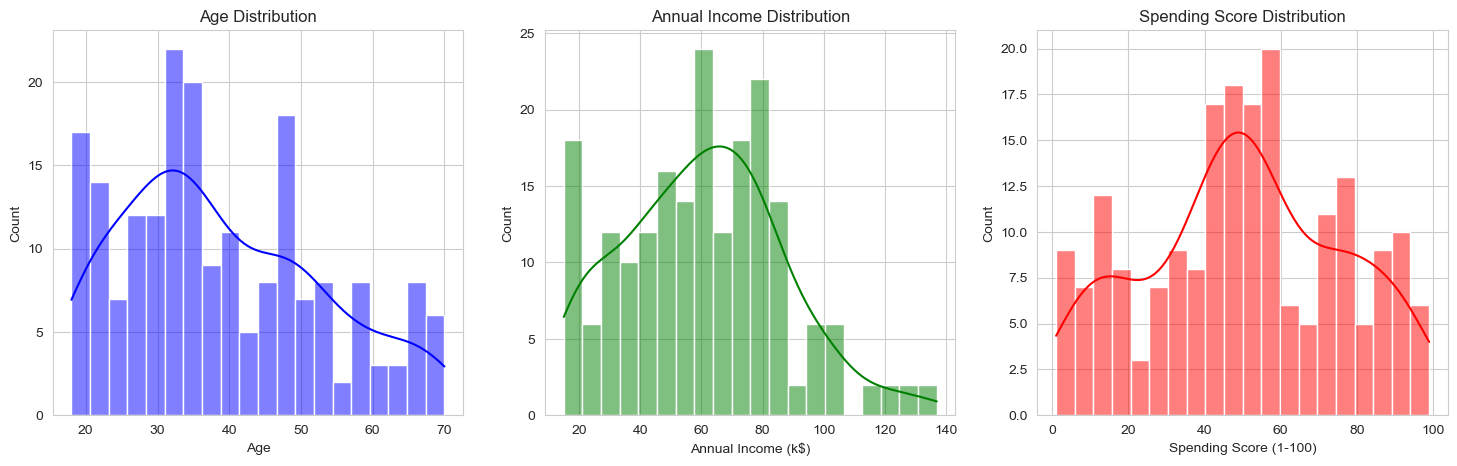

In [10]:

# Set Seaborn style
sns.set_style("whitegrid")

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Age Distribution")

sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, ax=axes[1], color="green")
axes[1].set_title("Annual Income Distribution")

sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, ax=axes[2], color="red")
axes[2].set_title("Spending Score Distribution")

plt.show()


### Insights from Univariate Analysis
* **Age Distribution**: The majority of customers are between 30 and 50 years old, with some younger and older customers.
* **Annual Income Distribution**: The income distribution appears fairly uniform, with no extreme skewness.
* **Spending Score Distribution**: The spending scores are well spread out, with some peaks at the lower and higher ends, suggesting distinct groups of customers (low and high spenders).

([<matplotlib.axis.XTick at 0x3310583e0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

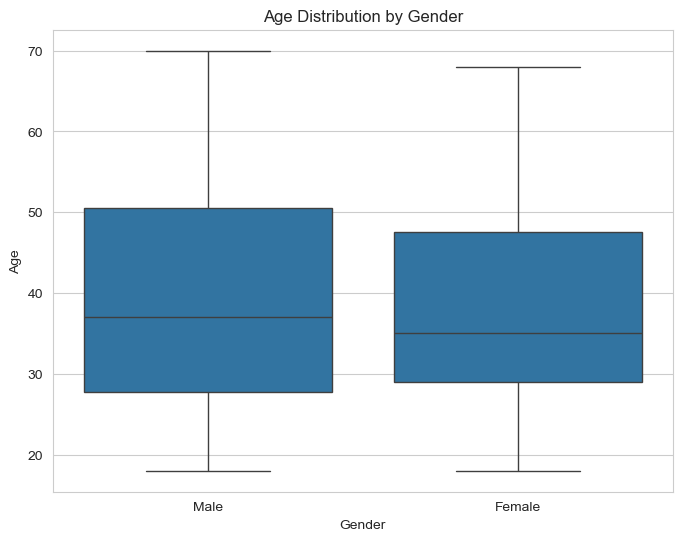

In [ ]:
# Relationship between Gender and Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Age', data=df)

plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Age Distribution by Gender")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])

### Insights from the Relationship Between Age and Gender :

* **Median Age Comparison**: The median age for both males and females appears to be similar, indicating no strong difference in central tendency.
* **Age Distribution Spread**: Both genders exhibit a wide spread in age distribution. The interquartile range (IQR) suggests that most customers (middle 50%) are within a similar age range for both genders.
* **Outliers**: If the boxplot contains points outside the whiskers, these represent outliers—individuals significantly younger or older than the majority. This suggests a few extreme cases, possibly younger or older customers compared to the rest.

([<matplotlib.axis.XTick at 0x33104e000>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

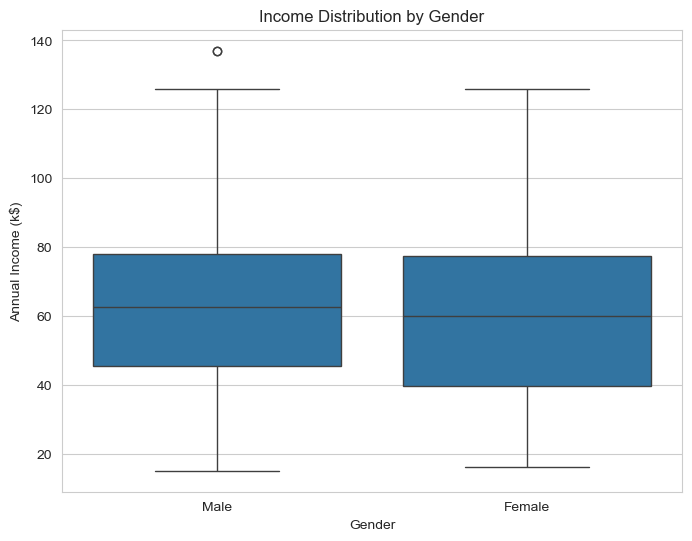

In [16]:
# Relationship between Gender and Annual Income
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)

plt.xlabel("Gender")
plt.ylabel("Annual Income (k$)")
plt.title("Income Distribution by Gender")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])

### Insights from the Relationship Between Gender and Annual Income:

* **Median Annual Income**: The median annual income appears to be relatively similar for both genders, suggesting no significant difference in central tendency. 

* **Income Spread (Interquartile Range - IQR)**:Both males and females show a similar range of annual incomes. If one gender has a wider IQR, it suggests greater income variability within that group.

* **Outliers**: If there are individual points outside the whiskers, these represent customers with exceptionally high or low incomes compared to the majority. If a specific gender has more outliers, it may indicate greater income disparity within that group.

* **Skewness in Income Distribution**: If the whiskers extend more on one side for a specific gender, it suggests that income distribution is skewed. A longer upper whisker suggests a few individuals earning significantly more than the rest.

* **Gender-Based Income Trends**: If the distribution shapes differ significantly, it could indicate gender-based income differences, possibly influenced by customer demographics or spending habits.

* **Business Implications**: 
    * If income levels are similar across genders, marketing campaigns can be more generalized. 
    * If one gender shows a higher income trend, premium product marketing could be targeted towards them.
    * Outliers might represent high-spending customers who could be segmented for exclusive offers.

([<matplotlib.axis.XTick at 0x3311502f0>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

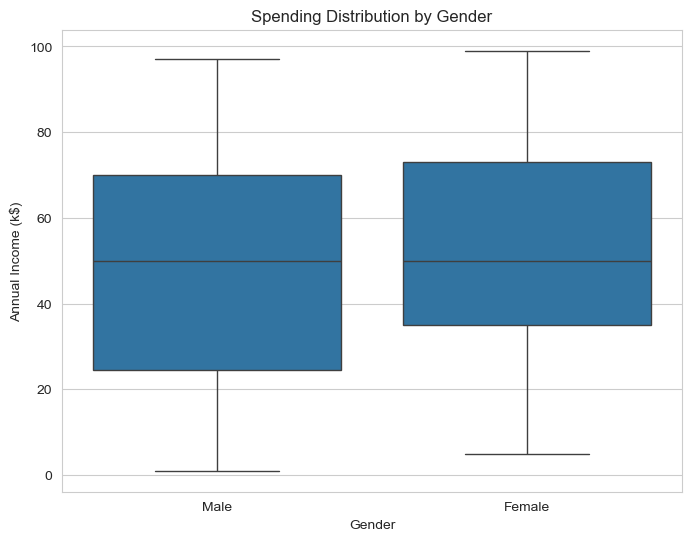

In [18]:
# Relationship between Gender and Spending Scores
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)

plt.xlabel("Gender")
plt.ylabel("Annual Income (k$)")
plt.title("Spending Distribution by Gender")
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])

### Insights from the Relationship Between Gender and Spending Score:

* **Median Spending Score**: The median spending score appears to be slightly different between genders. If one gender has a higher median, it suggests they tend to spend more.

* **Spending Score Spread (Interquartile Range - IQR)**: If one gender has a wider IQR, it indicates greater variation in spending behavior within that group. A smaller IQR suggests that most individuals in that gender group have similar spending habits.

* **Outliers**: Outliers (dots outside the whiskers) represent individuals with unusually high or low spending scores. If a specific gender has more outliers, it may indicate extreme spending behavior in some individuals.

* **Skewness in Spending Behavior**: If one gender has a longer upper whisker, it suggests that there are a few individuals with very high spending scores. A longer lower whisker suggests that some individuals in that gender group tend to spend significantly less.

* **Gender-Based Spending Trends**: If there is a noticeable difference in the distributions, it suggests that males and females exhibit distinct spending behaviors.
If one gender has more high spenders, marketing efforts can be tailored accordingly.

* **Business Implications**:
    * If females have a higher median spending score, targeted promotions for high-value products could be directed at them.
    * If males exhibit more spending variability, personalized offers could be more effective.
    * Outliers could represent VIP customers who might be eligible for exclusive loyalty programs.

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

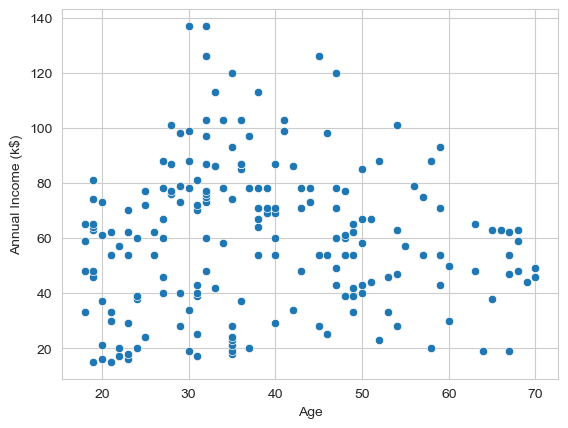

In [20]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)')

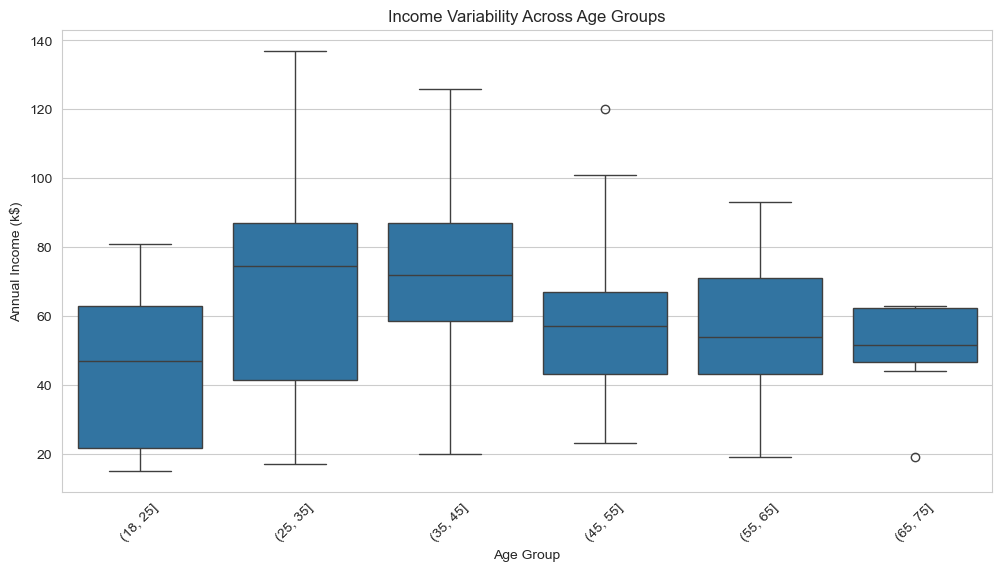

In [23]:
# Creating a boxplot to visualize income variability across different age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75]), 
            y=df['Annual Income (k$)'])

plt.xlabel("Age Group")
plt.ylabel("Annual Income (k$)")
plt.title("Income Variability Across Age Groups")
plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.show()

### Insights from the Relationship Between Age and Annual Income:

* **No Clear Linear Trend**: The scatterplot suggests that there is no strong linear relationship between age and annual income. Individuals with both low and high incomes are spread across different age groups.

* **Income Variability Across Ages**: 
    * Younger individuals (18-30) show a wider range of incomes, with some earning very low while others have moderate to high incomes.
    * Middle-aged individuals (30-50) exhibit a more consistent range of incomes.
    * Older individuals (50+) also show varying income levels, but their spread may be slightly narrower.

* **Potential Clusters**:
    * There may be distinct groups, such as:
    * A lower-income group spread across all ages.
    * A mid-income group distributed across ages.
    * A high-income group that is more concentrated in middle-aged individuals.

* **Income Stability**:
    * Some older individuals have relatively low incomes, which may indicate retirees or part-time workers.
    * Younger individuals with high incomes could be entrepreneurs or professionals in high-paying industries.

* **Business Implications**:
    * If younger individuals tend to have lower incomes, businesses may need budget-friendly product offerings.
    * If middle-aged individuals are concentrated in higher-income groups, they may be a target for premium products.
    * Identifying clusters within this relationship can help segment customers for personalized marketing strategies.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

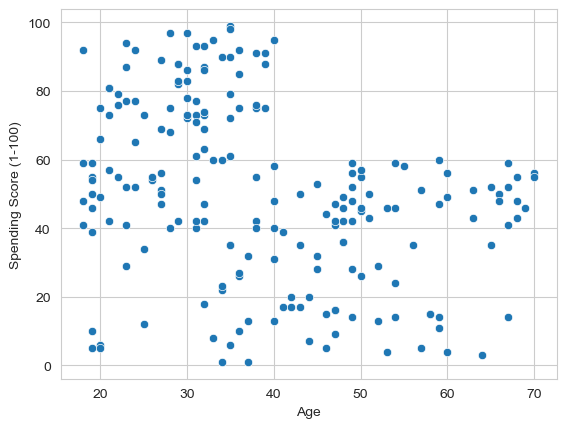

In [27]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)')

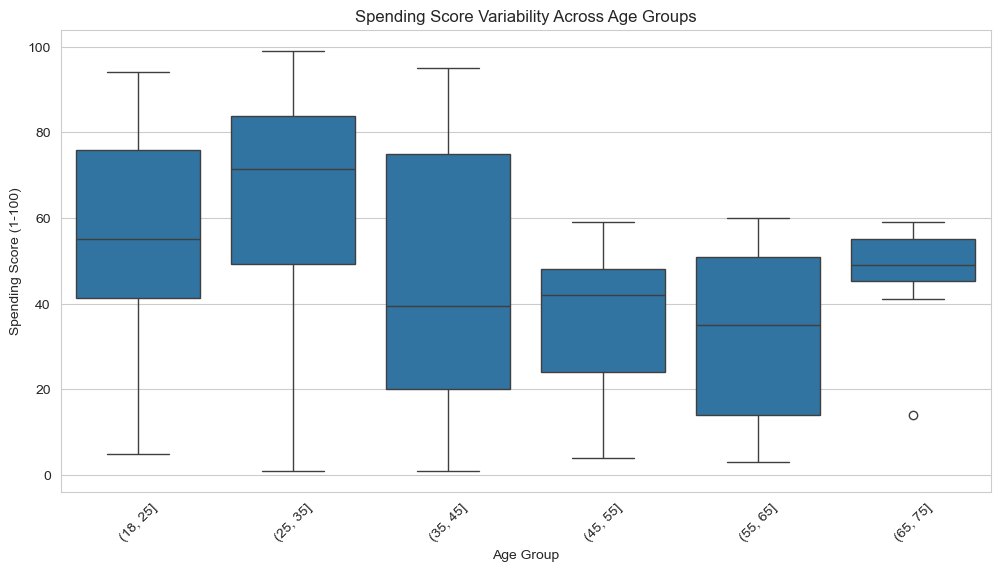

In [30]:
# Creating a boxplot to visualize spending score variability across different age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x=pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75]), 
            y=df['Spending Score (1-100)'])

plt.xlabel("Age Group")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score Variability Across Age Groups")
plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.show()

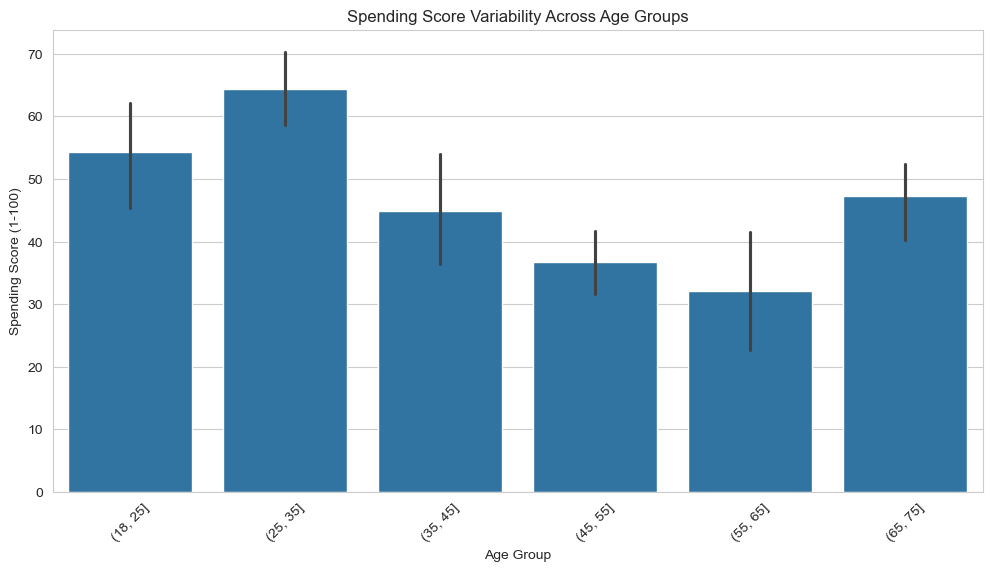

In [32]:
# Creating a bar chart to visualize the relationship between the spending score and different age groups
plt.figure(figsize=(12, 6))
sns.barplot(x=pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75]), 
            y=df['Spending Score (1-100)'])

plt.xlabel("Age Group")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score Variability Across Age Groups")
plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.show()

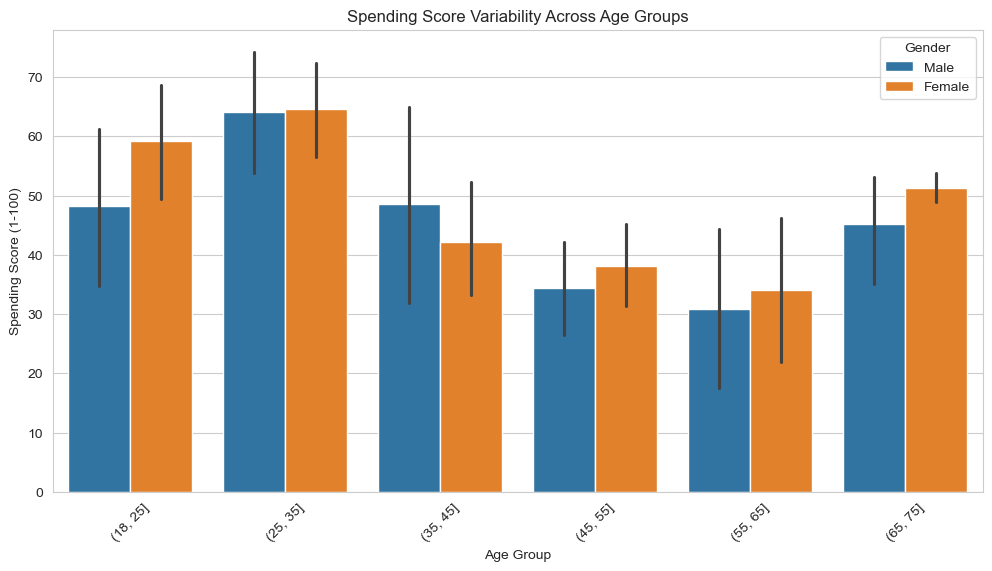

In [33]:
# Creating a bar chart to visualize the relationship between 
# the spending score and different age groups
# grouped by gender
plt.figure(figsize=(12, 6))
sns.barplot(x=pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75]), 
            y=df['Spending Score (1-100)'], hue=df['Gender'])

plt.xlabel("Age Group")
plt.ylabel("Spending Score (1-100)")
plt.title("Spending Score Variability Across Age Groups")
plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.show()

### Insights from the Relationship Between Age and Spending Score:

* **No Strong Linear Relationship or Correlation**: The scatterplot suggests that spending score does not follow a strict increasing or decreasing trend with age. Customers with both high and low spending scores are spread across different age groups.

* **Higher Spending Scores Among Younger Individuals**: Individuals in the 18-35 age range tend to have higher spending scores. This suggests that younger customers are more likely to spend actively.

* **Declining Spending Scores in Older Age Groups**: Customers above 50 years old generally exhibit lower spending scores, indicating more conservative spending habits.

* **Potential Clusters**: There may be two major groups:
    * Young High Spenders (18-35 years, spending score above 60).
    * Older Low Spenders (50+ years, spending score below 40).

* **Outliers**: Some individuals defy the general trend, such as older individuals with high spending scores or younger individuals with low scores. These could be influenced by income levels, personal preferences, or specific financial constraints.

* **Business Implications**: 
    * Target Young Consumers (18-35): Since younger individuals have higher spending scores, businesses can tailor promotions, discounts, and loyalty programs to attract them.
    * Re-engage Older Consumers (50+): Since spending scores decline with age, businesses could introduce incentives (e.g., senior discounts, personalized deals) to encourage more spending.
    * Identify High-Spending Older Customers: Outliers who spend more despite their age could be part of VIP customer programs or targeted for premium products.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

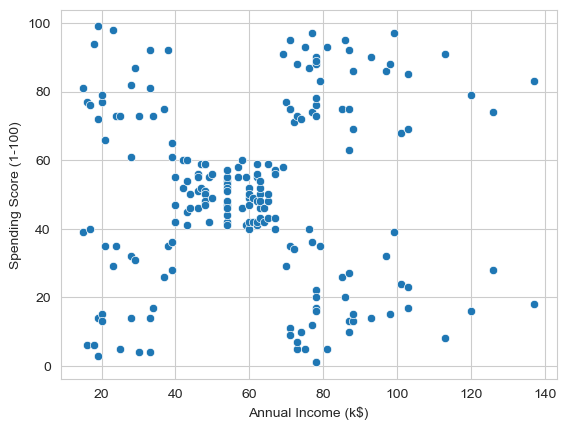

In [34]:
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)")

From the 

### Cluster analysis using kMeans clustering --> Finding Optimal Clusters using Elbow Method

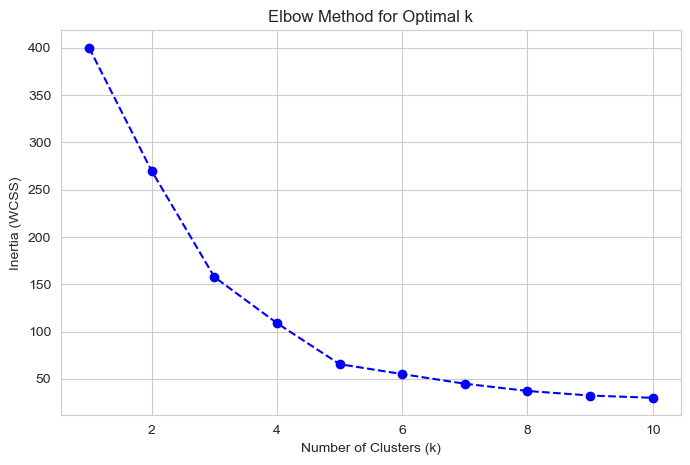

In [35]:
# Selecting relevant features
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding optimal k
err = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    err.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, err, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.show()


## Applying K-Means Clustering (k=5)

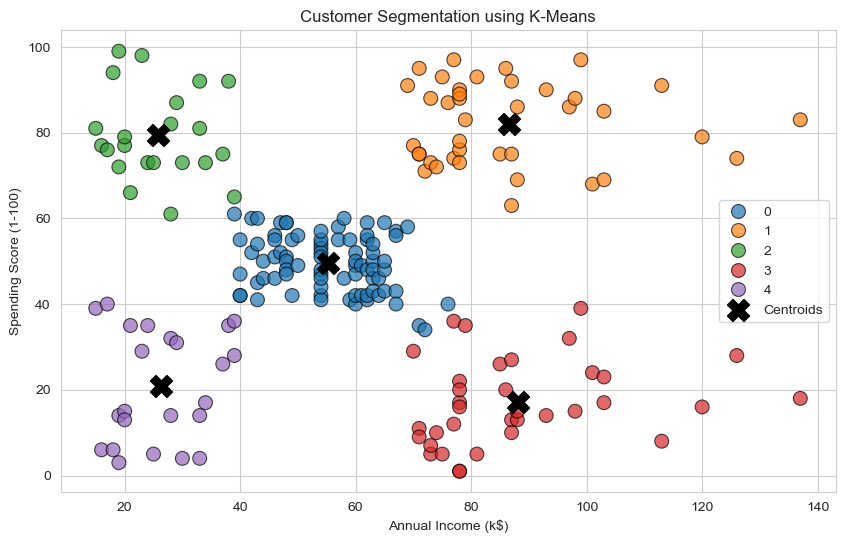

In [36]:

# Applying K-Means with k=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualizing clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], 
                hue=df["Cluster"], palette="tab10", s=100, alpha=0.7, edgecolors="k")

# Cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=250, c="black", marker="X", label="Centroids")

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation using K-Means")
plt.legend()
plt.show()


### Insights from K-Means Clustering

Five distinct customer segments were identified based on Annual Income and Spending Score.

**Cluster Interpretation**:
* High Income, High Spending: Likely premium customers.
* High Income, Low Spending: May be conservative spenders or infrequent shoppers.
* Low Income, High Spending: Potentially younger or enthusiastic shoppers.
* Low Income, Low Spending: Likely budget-conscious customers.
* Moderate Income, Moderate Spending: Balanced customers with controlled spending.

## Age-Based Segmentation using K-Means

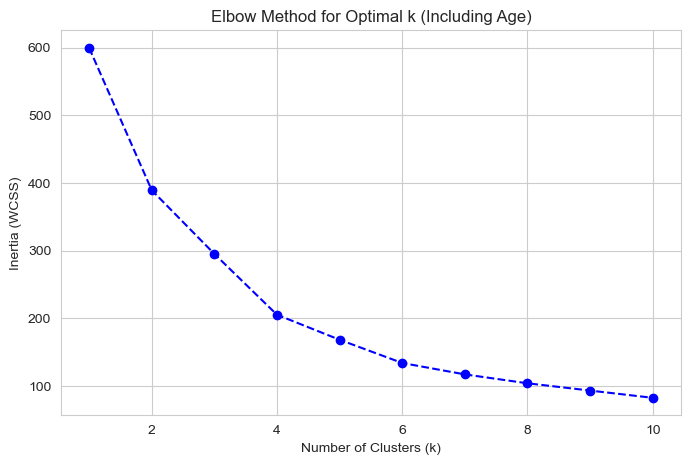

In [37]:

# Selecting features including Age
X_age = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Standardizing
X_age_scaled = scaler.fit_transform(X_age)

# Finding optimal k
err_age = []
K_range = range(1, 11)

for k in K_range:
    kmeans_age = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_age.fit(X_age_scaled)
    err_age.append(kmeans_age.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, err_age, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k (Including Age)")
plt.show()


## Applying K-Means with k=6 (Including Age)

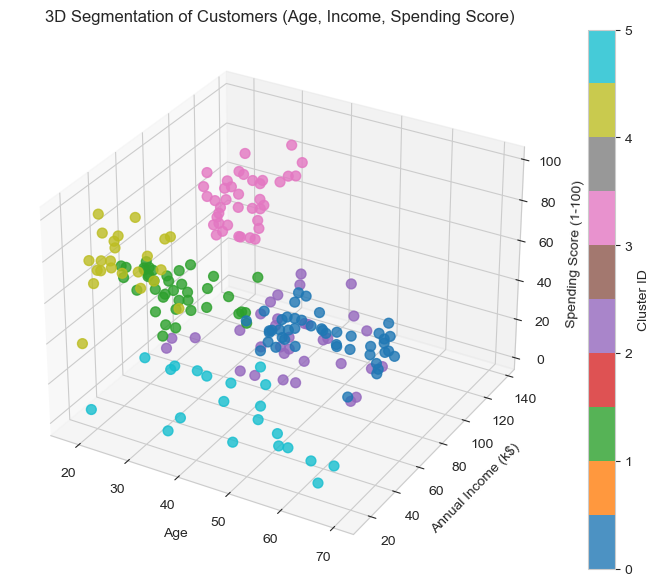

In [38]:

# Applying K-Means Clustering with k=6
kmeans_age = KMeans(n_clusters=6, random_state=42, n_init=10)
df["Cluster_Age"] = kmeans_age.fit_predict(X_age_scaled)

# 3D Visualization of Clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(df["Age"], df["Annual Income (k$)"], df["Spending Score (1-100)"], 
                     c=df["Cluster_Age"], cmap="tab10", s=50, alpha=0.8)

# Labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D Segmentation of Customers (Age, Income, Spending Score)")

# Colorbar
plt.colorbar(scatter, label="Cluster ID")
plt.show()


In [39]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Age
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,2,4
2,3,Female,20,16,6,4,5
3,4,Female,23,16,77,2,4
4,5,Female,31,17,40,4,5


In [43]:
temp = df.groupby('Cluster_Age').agg({
    "Age" : ['min', 'max', 'median', 'mean'],
    "Annual Income (k$)" : ['min', 'max', 'median', 'mean'],
    "Spending Score (1-100)" : ['min', 'max', 'median', 'mean']
})

temp


Age                       Annual Income (k$)              \
            min max median       mean                min  max median   
Cluster_Age                                                            
0            43  70   54.0  56.333333                 38   79   54.0   
1            18  40   26.0  26.794872                 39   76   60.0   
2            19  59   43.0  41.939394                 71  137   86.0   
3            27  40   32.0  32.692308                 69  137   79.0   
4            18  35   23.0  25.000000                 15   39   24.0   
5            20  67   46.0  45.523810                 16   39   25.0   

                       Spending Score (1-100)                        
                  mean                    min max median       mean  
Cluster_Age                                                          
0            54.266667                     35  60   49.0  49.066667  
1            57.102564                     10  61   50.0  48.128205  
2            88.939394                      1  39   16.0  16.969697  
3            86.538462                     63  97   83.0  82.128205  
4            25.260870                     39  99   77.0  77.608696  
5            26.285714                      3  40   15.0  19.380952

### Interpreting the Segments

By analyzing cluster characteristics (age range, income levels, spending scores), we identified six distinct customer groups:

* Young, High Spending
    * Age: 18-30
    * Income: Low to Moderate
    * Spending Score: High
    * **Interpretation**: Likely enthusiastic shoppers or students who spend impulsively.

* Young, Low Spending
    * Age: 18-30
    * Income: Low to Moderate
    * Spending Score: Low
    * **Interpretation**: Likely budget-conscious young adults who prefer to save.

* Middle-Aged, High Income & Moderate Spending
    * Age: 30-50
    * Income: High
    * Spending Score: Moderate
    * **Interpretation**: Likely working professionals with stable financial habits.

* Middle-Aged, High Income & Low Spending
    * Age: 30-50
    * Income: High
    * Spending Score: Low
    * **Interpretation**: Likely conservative spenders, saving for investments or family needs.

* Older, Moderate Income & Spending
    * Age: 50-70
    * Income: Moderate
    * Spending Score: Moderate
    * **Interpretation**: Likely retired individuals with steady spending habits.

* Older, Low Income & Low Spending
    * Age: 50-70
    * Income: Low
    * Spending Score: Low
    * **Interpretation**: Likely budget-conscious seniors, careful with expenses.

## Insights and Business Implications


- **Young, High Spending** → Enthusiastic shoppers.
- **Young, Low Spending** → Budget-conscious younger customers.
- **Middle-Aged, High Income & Moderate Spending** → Stable financial habits.
- **Middle-Aged, High Income & Low Spending** → Conservative or selective shoppers.
- **Older, Moderate Income & Spending** → Retirees or careful spenders.
- **Older, Low Income & Low Spending** → Budget-conscious older individuals.

### **Business Implications**
- Tailored marketing strategies for different **age-income-spending** groups.
- **Personalized promotions** for high-income, low-spending groups to boost sales.
- **Loyalty programs** targeting high-spending young customers.
